# Gradient Descent
In this file, I will define functions by myself to do the gradient descent.

# Import the necessary libraries.

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import numpy as np
import os
import seaborn as sns
sns.set_theme()

# I plan to define a binary function to do the grdient descent.
The function is f(x1,x2)=exp(x1+3x2-0.1)+exp(x1-3x2-0.1)+exp(-x1-0.1)

In [38]:
# define the function
def f(X):
    x1 = X[0]
    x2 = X[1]
    item1 = np.exp(x1 + 3 * x2 - 0.1)
    item2 = np.exp(x1 - 3 * x2 - 0.1)
    item3 = np.exp(-x1 - 0.1)
    return item1 + item2 + item3
# define loss function for x1
def derivative_x1(x1, x2, delta=1e-6):
    X_delta1 = [x1 + delta, x2]
    X_delta2 = [x1 - delta, x2]
    return (f(X_delta1) - f(X_delta2)) / (2 * delta)
# define loss function for x2
def derivative_x2(x1, x2, delta=1e-6):
    X_delta1 = [x1, x2 + delta]
    X_delta2 = [x1, x2 - delta]
    return (f(X_delta1) - f(X_delta2)) / (2 * delta)
# define gradient
def gradient(X, delta=1e-6):
    x1 = X[0]
    x2 = X[1]
    return np.array([derivative_x1(x1, x2, delta), derivative_x2(x1, x2, delta)])

def norm(vector):
    return np.sqrt(sum([i**2 for i in vector]))


# Give original values

In [39]:

alpha = 0.4
beta = 0.5
epsilon = 1e-6# Accuracy of the modes of the gradient
k = 0

X = np.array([1, 1])
t = 1

k_list = [k]
X_all = X


In [40]:
#When the mode of the gradient is higher than the accuracy requirement, the iteration needs to be continued
while norm(gradient(X)) > epsilon:
   #assertain the step size
    while f(np.subtract(X, t * gradient(X))) > f(X) - alpha * t * gradient(X).T @ gradient(X):
        t = beta * t

    k = k + 1
    k_list.append(k)
    X = X - t * gradient(X)
    X_all = np.vstack((X_all, X))
    # print("k = %d, X = %s, f(X) = %f" % (k, X, f(X)))
print("value of x1 and x2 is：X* = {}\n minimum of y is：f(X*) = {}".format(X, f(X)))


value of x1 and x2 is：X* = [-3.4657320e-01 -1.0000889e-12]
 minimum of y is：f(X*) = 2.559266696658411


# Plotting the number of iterations versus the value taken by the independent variable.

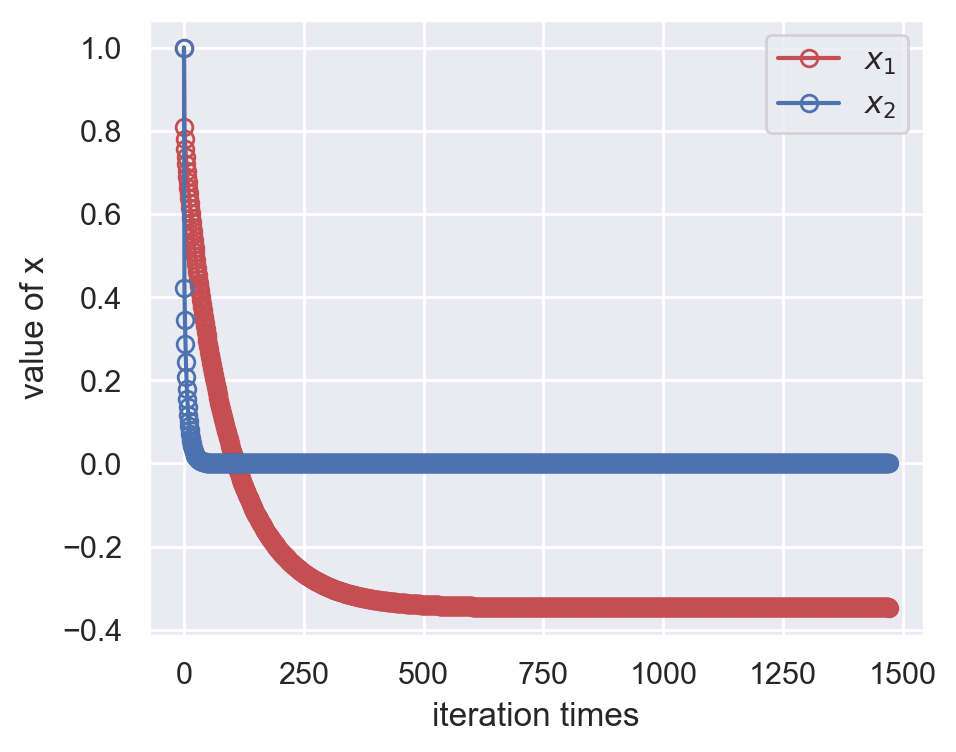

In [41]:

fig = plt.figure(figsize=(5, 4), dpi=200)
plt.plot(X_all[:,0], 'r-o', markerfacecolor='none', label=r'$x_1$')
plt.plot(X_all[:,1], 'b-o', markerfacecolor='none', label=r'$x_2$')
plt.xlabel('iteration times', usetex=False) 
plt.ylabel('value of x', usetex=False)
plt.legend()


# Plotting iterative trajectories with contour maps.

Text(0, 0.5, '$x_2$')

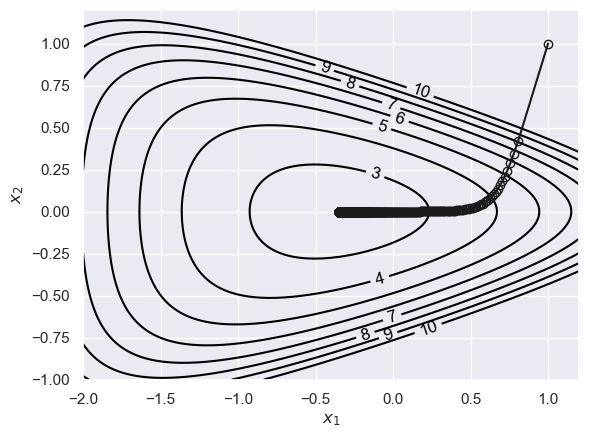

In [42]:

x1 = np.linspace(-2, 1.2, 1000)
x2 = np.linspace(-1, 1.2, 1000)
X1, X2 = np.meshgrid(x1, x2)
Y = np.exp(X1 + 3 * X2 - 0.1) + np.exp(X1 - 3 * X2 - 0.1) + np.exp(-X1 - 0.1)
C = plt.contour(X1, X2, Y, levels=[3, 4, 5, 6, 7, 8, 9, 10], colors='black')
plt.clabel(C, inline=True) 
plt.plot([i[0] for i in X_all], [i[1] for i in X_all], 'k-o', markerfacecolor='none') 
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
